## Set up 

First, lets import packages that are required.<br>
Note* not all packages used are list here, some of them are imported in later cells.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load dataset
The training and test set are already splitted. 

In [2]:
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

## Overview of the Data

### Take a quick look

There are 325 observations in the training set with 28 features. There's only one categorical column and else are  numerical type. The data seems quite clean with no null values.

In [3]:
train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                325 non-null    object 
 1   b1                   325 non-null    int64  
 2   b2                   325 non-null    int64  
 3   b3                   325 non-null    int64  
 4   b4                   325 non-null    int64  
 5   b5                   325 non-null    int64  
 6   b6                   325 non-null    int64  
 7   b7                   325 non-null    int64  
 8   b8                   325 non-null    int64  
 9   b9                   325 non-null    int64  
 10  pred_minus_obs_H_b1  325 non-null    float64
 11  pred_minus_obs_H_b2  325 non-null    float64
 12  pred_minus_obs_H_b3  325 non-null    float64
 13  pred_minus_obs_H_b4  325 non-null    float64
 14  pred_minus_obs_H_b5  325 non-null    float64
 15  pred_minus_obs_H_b6  325 non-null    flo

In [5]:
train.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000,55.786769,...,-3.341446,-20.004954,-1.086092,-4.375846,-21.664185,-0.979815,-4.633323,-18.996462,-1.701785,-4.229108
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777,12.347445,...,8.921301,2.908311,1.054544,1.850954,3.594512,0.308081,1.054033,3.307265,1.017594,1.150070
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,...,-58.280000,-26.790000,-5.510000,-10.120000,-34.630000,-1.830000,-7.970000,-29.340000,-6.500000,-8.930000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000,48.370000,...,-4.660000,-22.250000,-1.750000,-5.530000,-24.220000,-1.190000,-5.410000,-21.780000,-2.360000,-4.870000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000,57.560000,...,-1.250000,-19.950000,-1.030000,-4.490000,-21.040000,-0.990000,-4.670000,-18.870000,-1.650000,-4.150000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000,64.120000,...,1.430000,-18.250000,-0.390000,-2.770000,-19.060000,-0.780000,-3.900000,-16.770000,-1.030000,-3.290000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000,86.080000,...,9.580000,-7.760000,1.780000,1.040000,-12.070000,0.260000,-0.770000,-8.330000,2.580000,-0.590000


### Visualise data 

Let's take a brief look of the distribution of numerical columns in histogram. b4 and b7 columns look like they are normally distributed while other b columns are right skewed. While columns that start with pre_minus_obs are either  normally distributed or left skewed. <br>

The number of instances for each class label is not well-balanced, class s is the most common type of forest which is 3 times more than class h and o. However, we're not sure if the ratio of different forest type is representative of the overall real-world forest type ratio, but the class ratio between test and training set are not matched as well which may induce sampling bias. Therefore, we probably should go back to the splitting stage and do stratified split, to ensure the class category proportions of test set is similar to the overall dataset. 

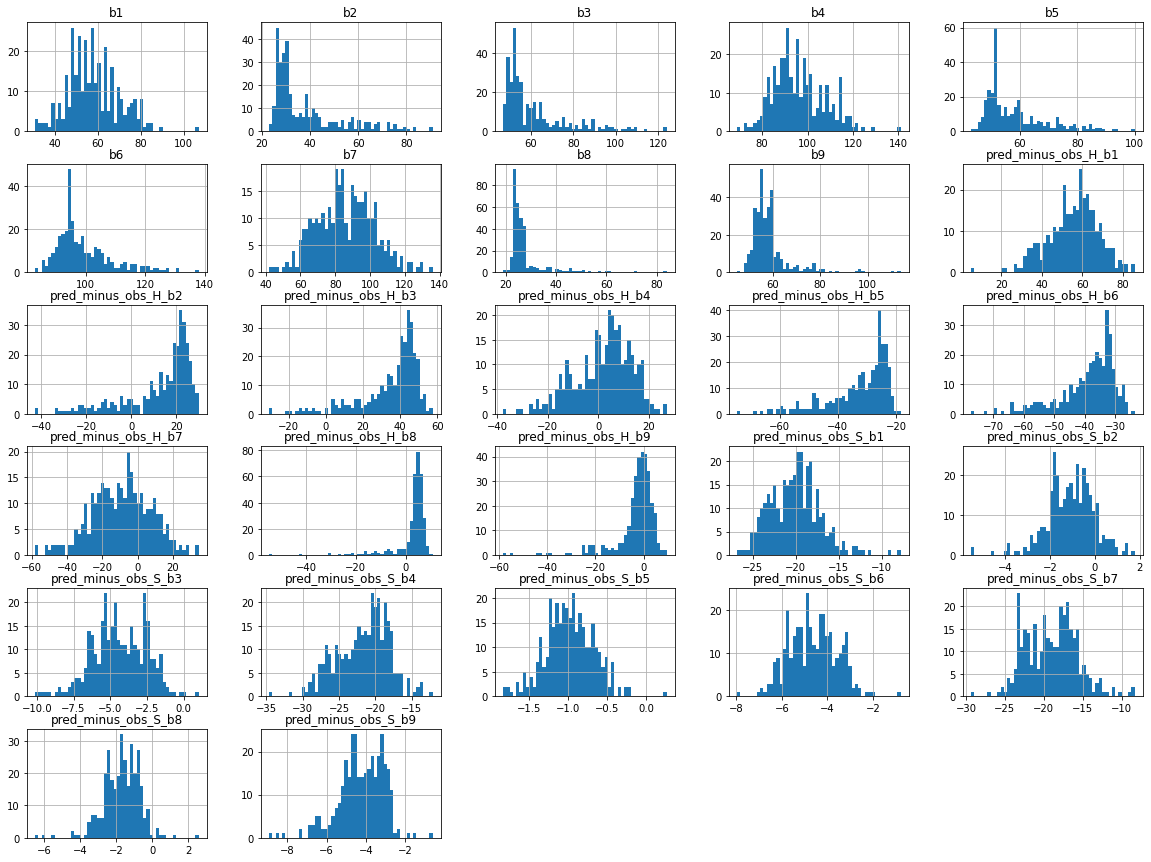

In [6]:
train.hist(bins=50, figsize=(20,15))
plt.show()

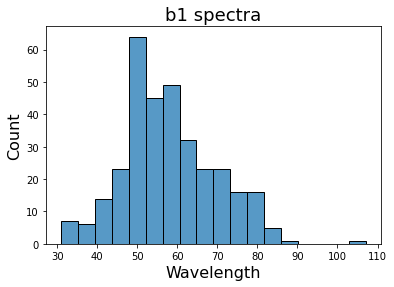

In [7]:
sns.histplot(x='b1', data=train)
plt.title('b1 spectra', fontsize=18)
plt.xlabel('Wavelength', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()  

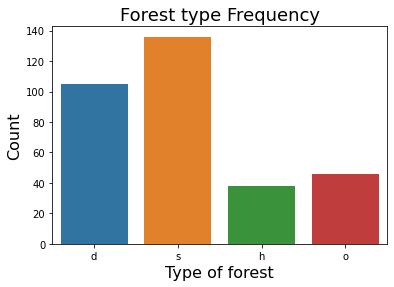

In [8]:
# frequency of forest type
sns.countplot(x='class', data=train)
plt.title('Forest type Frequency', fontsize=18)
plt.xlabel('Type of forest', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()           

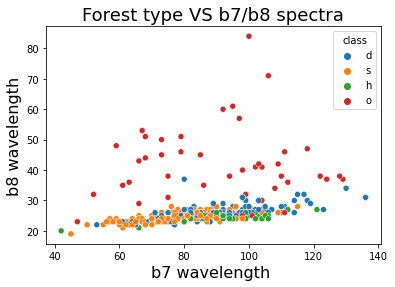

<Figure size 1440x720 with 0 Axes>

In [9]:
# class d,s,h have very similar pattern between b7 and b8 spectra 
# b8 below 30 for all class type except o and b7 range from 40-140)
%matplotlib inline
sns.scatterplot(x='b7', y='b8', hue='class', data=train)
plt.title('Forest type VS b7/b8 spectra', fontsize=18)
plt.xlabel('b7 wavelength ', fontsize=16)
plt.ylabel('b8 wavelength', fontsize=16)
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
# same spectra between month is differnt, linear relationship between March and September
sns.regplot(x='b1', y='b4', data=train)
plt.title('Green spectra', fontsize=18)
plt.xlabel('Sep (wavelength)', fontsize=16)
plt.ylabel('Mar(wavelength)', fontsize=16)
plt.show()

If the input data columns are in the order as the data description described, b1 and b4 refers to same spectra measured in differnt months in different year, and we can see from the scatter plot above that the wavelength is higher in March than in September. <br>

To invetigate that more, I've taken the average of all columns that start with b and plot them in barplot and coloured them by the month they were measured (same colour for same month and year). We can see from the barplot below that wavelength of spectra are different across month and red spectral has the lowest wavelength across all 3 days.

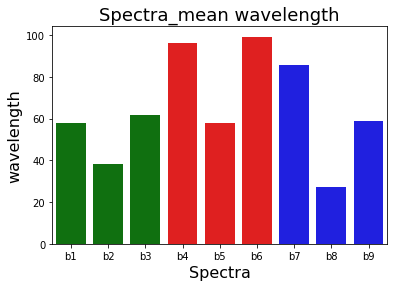

In [10]:
spectra_mean = train.describe().iloc[1:2,0:9].T
spectra_mean.insert(0, 'forest', ['b1','b2','b3','b4','b5','b6','b7','b8','b9'])
palette = [color for color in ['green','red', 'blue'] for _ in range(3)]
sns.barplot(x='forest', y='mean', data=spectra_mean, palette=palette)
plt.title('Spectra_mean wavelength', fontsize=18)
plt.xlabel('Spectra', fontsize=16)
plt.ylabel('wavelength', fontsize=16)
plt.show()

In [11]:
# create new column which is the average of three measures in three consecutive years
train['green'] = train[['b1','b4','b7']].mean(axis=1)
train['red'] = train[['b2','b5','b8']].mean(axis=1)
train['infra'] = train[['b3','b6','b9']].mean(axis=1)

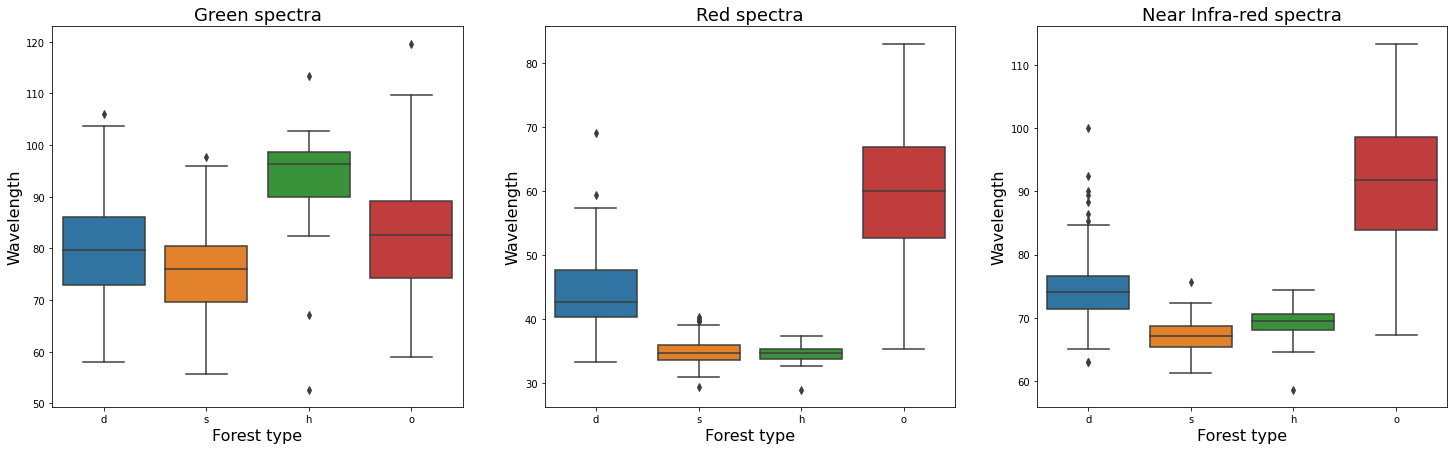

In [12]:
# plot boxplot in one (ditched because too messy): 
# dd=pd.melt(train,id_vars=['class'],value_vars=['green','red','infra'],var_name='spectra')
# sns.boxplot(x='class',y='value',data=dd,hue='spectra')

# boxplot for the new columns created above 

plt.rcParams['figure.figsize'] = [25,7] # change the size of figure 

# function setting the labels
def sep_box(y,title, data=train):              
    sns.boxplot(x = 'class', y = y, data=train)
    plt.title(title,fontsize=18)
    plt.xlabel('Forest type',fontsize=16)
    plt.ylabel('Wavelength',fontsize=16)

plt.subplot(1, 3, 1) # row 1, col 2 index 1
sep_box(y='green',title='Green spectra')

plt.subplot(1, 3, 2) # index 1
sep_box(y='red',title='Red spectra')

plt.subplot(1, 3, 3) # index 3
sep_box(y='infra',title='Near Infra-red spectra')

plt.show()

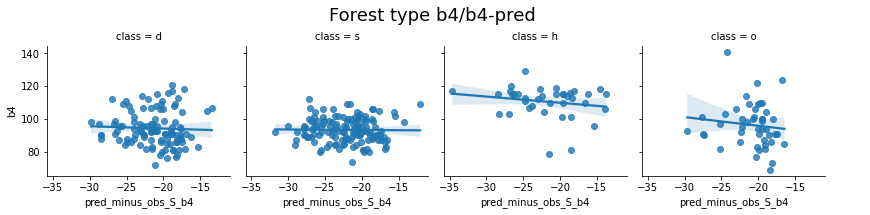

In [13]:
pred = sns.FacetGrid(train, col='class',margin_titles=True)
pred.map(sns.regplot, 'pred_minus_obs_S_b4', 'b4').add_legend()
pred.fig.subplots_adjust(top=0.8)
pred.fig.suptitle('Forest type b4/b4-pred', size=18)
plt.show()

## Data Transformation

Not much cleaning is required for the datset, as mentioned above the data is very clean. 

SVC is very sensitive to outliers and there are some outliers present, but since it's a small dataset, outlier treatment is not considered. From below output we can see b8 has 41 outliers and that's almost 13% of the data, thus it is not a good idea to remove those data.

SVC algorithm (and others) don’t perform well when input the numerical attributes have very different scales. So before we fit our data to the algorithms, it is important to make sure that all attributes have the same scale.
<br>

We'll use standardization here as it is much less affected by outliers than minmaxscaler.


In [ ]:
Q1 = train.quantile(0.25)  
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
top = Q1 - 1.5 * IQR
bottom = Q3 + 1.5 * IQR

In [ ]:
# count number of outliers in the dataset
# series and dataframe comaprision is deprecated, must align first using axis =1: align on columns
train, top = train.align(top, axis=1, copy=False)  
train, bottom = train.align(bottom, axis=1, copy=False)
((train < top) | (train > bottom)).sum()

In [ ]:
# only keep columns start with b
# or use regex to remove columns start with pred_minus_obs and keep extra columns generated from previous steps
# use negtive regex: r"^(?!pred_minus_obs.*)" 
train_pre = train.filter(regex='^b.*')
test_pre = test.filter(regex='^b.*')
train_label = train['class']
test_label = test['class']

In [ ]:
# train_pre.groupby('class').count() if its dataframe
# proportion of each class 
train_label.value_counts(normalize=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# perform feature scaling: standardisation
scaler = StandardScaler()
train_pre_tran = scaler.fit_transform(train_pre)
test_pre_tran = scaler.transform(test_pre)

## Model training 

### Training and evaluating on training set

SVC: set decision_function_shape to one-versus-one that train a binary classifier for every pair of class type . SGDClassifier uses one-versus-rest strategy which train one classifier classifier per class type<br>

SVC perform better than SGD model with accuracy of 0.886 while the accuracy for SGD is 0.856. The classification report reports the performance scores for each class label seperately. 

Since the training data is unbalanced and class_weight='balanced' is used to adjust weights inversely proportional to class frequencies, after set the class_weight parameter to balanced, the model perform slightly worse than just leave all class as the weight one (if leave this parameter as default which all class with weight of 1, the accuracy is 0.908).

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report

# decision_function_shape default is 'ovr' set to ovo as required 
# gamma = 1 / (n_features * X.var()) or 1 / n_features or self-defined set of values
# tol: Tolerance for stopping criterion.
# default kernel is rbf
svc = SVC(decision_function_shape='ovo', tol= 0.001, gamma="auto", shrinking=True, class_weight ='balanced',
          random_state=43)
svc.fit(train_pre_tran,train_label)

In [ ]:
svc_prediction = svc.predict(train_pre_tran)
accuracy_score(train_label,svc_prediction)

In [ ]:
target_names = ['s','d','o','h']
print(classification_report(train_label, svc_prediction, target_names=target_names))

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, early_stopping= True, learning_rate='optimal',class_weight ='balanced') 
sgd_clf.fit(train_pre_tran,train_label)

In [ ]:
sgd_prediction = sgd_clf.predict(train_pre_tran)
accuracy_score(train_label,sgd_prediction)

In [ ]:
print(classification_report(train_label, sgd_prediction, target_names=target_names))

### Cross Validation (3-fold)

Splitting the training set into 3 folds then make predictions and evaluating on each fold. <br>

First, use the cross_val_score function from sklearn and we can see the SVC model accuracy is above 0.82 and the SGD model is 0.75. <br>

Since the data is not balanced, stratified cross validation is then performed.

In [ ]:
from sklearn.model_selection import cross_val_score

# perfrom cross validation using off-the-shelf cross validation from sklearn 
cross_val_score(svc,train_pre_tran,train_label, cv=3, scoring='accuracy')

In [ ]:
cross_val_score(sgd_clf,train_pre_tran,train_label, cv=3, scoring='accuracy')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# stratified cross-validation, ensure each fold has the same class ratio
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
def cross_val(model,x=train_pre_tran, y=train_label):
    clone_model = clone(model)
    lst_accu_stratified = []
    for train_index, test_index in skf.split(x, y):
        x_train_fold, x_test_fold = x[train_index], x[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        clone_model.fit(x_train_fold, y_train_fold)
        lst_accu_stratified.append(clone_model.score(x_test_fold, y_test_fold))
    print(lst_accu_stratified)

In [ ]:
cross_val(svc)

In [ ]:
cross_val(sgd_clf)

## Model tuning 

### GridSearch

Find the optimal hyperparameters of SVC and SGD model which gives the highest accuracy score.

####  SVC model
Kernels: take low dimensional input space and transform it into a higher-dimensional space. The accuracy above doesn't look very bad, however, some datasets may not be linear separable and other kernal function may acheive a better result. Different kernals such as'rbf', 'sigmoid','poly','linear' used selected to find the combination of hyperparameter that with highest accuracy score.

The choice of C and gamma hyperparameter is very important for SVM model especially for kernel RBF, so let's try to found the optimal value for those two.

C: penalty parameter, which represents misclassification/error term. The misclassification term tells the SVM optimisation how much error is bearable. Use this to control the trade-off between decision boundary and misclassification term. When C is high it will classify all the data points correctly, which increase the chance to overfit. Five c values (0.01, 0.1, 1, 10, 100)  were used to in combination with other two hyperparameters to find the highest accuracy.

Gamma: how far influences the calculation of plausible line of separation. When gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.
'scale' is passed then it uses 1 / (n_features * X.var()) as value of gamma while ‘auto’uses 1 / n_features. 
Can also try with self defined value range, tried gamma value [0.001,0.01,0.1,1,10], however the default(scale) perform the best.

The best combination of parameters that give the highest accuracy score is {'C': 1, 'gamma': 'scale', 'kernel': 'linear'} (this output doesnt report the default parameters and parameters set above)  with a accuracy of 0.867.

In [ ]:
from sklearn.model_selection import GridSearchCV 

# grid search for svc ovo
param_grid = [{
    'kernel':['rbf', 'sigmoid','poly','linear'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale','auto']
}]

grid_search_svc = GridSearchCV(svc, param_grid, cv=3, 
                           scoring='accuracy',
                          return_train_score=True)
grid_search_svc.fit(train_pre_tran,train_label)

In [ ]:
grid_search_svc.best_params_

In [ ]:
grid_search_svc.best_score_

#### SGDClassifier 
Loss: The loss function to be used. There are many loss function available and 'hinge', 'log','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive' have been chosen.

Penalty: The penalty to be used ('l1','l2','elasticnet') 

early_stopping: boolean variable either true or false. To decide whether to use early stopping to terminate training when validation score is not improving. 

eta0 define the initial learning rate and I've tried it with different of learning rate and it require many iterations (more than 100000) to reach convergence. 

The algorithm perform better when alpha (regularization term) is greater than the default 0.0001. This parameter also determine the learning rate when learning rate is set to 'optimal' thus the higher the alpha, the more iternation is needed to converge.

The best combination of parameters is {'alpha': 0.001, 'early_stopping': True, 'loss': 'hinge', 'penalty': 'l2'} and the accuracy is 0.864 which is simialr to SVC model.

In [ ]:
# grid search for sgd classifier
param_grid = [{
    'loss':['hinge', 'log','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty':['l1','l2','elasticnet'],
    'early_stopping':[True, False],
    'alpha':[0.0001,0.001]
}]

grid_search_sgd = GridSearchCV(sgd_clf, param_grid, cv=3, 
                           scoring='accuracy',
                           return_train_score=True)

grid_search_sgd.fit(train_pre_tran,train_label)

In [ ]:
grid_search_sgd.best_params_

In [ ]:
grid_search_sgd.best_score_

### Performance of tuned model on training set

Again, tuned SVC model performe better than SGD model (0.883 vs 0.833). From the confusion matrix graphs below we can see there is a clear diagonal for the two models which means predicted label match with actual label. Accuracy of class h and d for SVC are better than SGD.

The misclassification trend for the two model is very simialr that actual d, h class has a significant amount of number misclassified as s class, s misclassified d or h and classified o as d. 

One thing to be noted is that the precision, recall, f1 and accruacy score are the same for multicalss problem if the metrics is calcualted at a global level this is because if there is a false positive, there will always also be a false negative and vice versa. 

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# plot confusion matrix
def matrix(y_true,y_pred, model):
    mx = confusion_matrix(y_true,y_pred)
    disp = ConfusionMatrixDisplay(mx,display_labels=model.classes_) 
    disp.plot()

#  plt.matshow(mx, cmap=plt.cm.gray)
#  plt.show()

# average micro: 
# Calculate metrics globally by counting the total true positives, false negatives and false positives
def performance(y_true,y_pred,model):
    print(model)
    print('precision:', precision_score(y_true, y_pred, average='micro'))
    print('recall:', recall_score(y_true, y_pred, average='micro'))
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('f1:', f1_score(y_true, y_pred, average='micro'))

In [ ]:
final_svc_model = grid_search_svc.best_estimator_
final_svc_prediction = final_svc_model.predict(train_pre_tran)

In [ ]:
matrix(train_label,final_svc_prediction,final_svc_model)

In [ ]:
performance(train_label,final_svc_prediction,'svc-model')

In [ ]:
final_sgd_model = grid_search_sgd.best_estimator_
final_sgd_prediction = final_sgd_model.predict(train_pre_tran)

In [ ]:
matrix(train_label,final_sgd_prediction,final_sgd_model)

In [ ]:
performance(train_label,final_sgd_prediction,'sgd-model')

## Evaluate model on test set

The two models perform very similar on test set as compared to training set which means the model generalised quite well. By looking at the confusion matrix, the misclassification pattern is very simialr as well for both model

SVC perform better in the h and d class than SGD, both models classified a large number of h as s.

SVC is perform slightly better than SGD with accuracy of 0.899 and 0.888, respectively.

In [ ]:
final_sgd_predictions = final_sgd_model.predict(test_pre_tran)
final_svc_predictions = final_svc_model.predict(test_pre_tran)

In [ ]:
print(classification_report(test_label, final_svc_predictions, target_names=target_names))
print("accuracy_score:", accuracy_score(test_label,final_svc_predictions))
matrix(test_label,final_svc_predictions,final_svc_model)

In [ ]:
print(classification_report(test_label, final_sgd_predictions, target_names=target_names))
print("accuracy_score:", accuracy_score(test_label,final_sgd_predictions))
matrix(test_label,final_sgd_predictions,final_sgd_model)

In [13]:
import numpy as np

In [14]:
cm = np.array([[22,1,1], [4,45,2], [1,1,23]])

In [18]:
true_pos = np.diag(cm)
false_pos = np.sum(cm, axis=0) - true_pos
false_neg = np.sum(cm, axis=1) - true_pos
precision = np.sum(true_pos / (true_pos + false_pos)) /3
recall = np.sum(true_pos / (true_pos + false_neg)) /3

In [19]:
precision

0.8856256693136126

In [20]:
recall

0.9063398692810457

In [6]:
true_pos = np.diag(cm).sum()
precision = np.sum(true_pos / np.sum(cm, axis=0).sum())
recall = np.sum(true_pos / np.sum(cm, axis=1).sum())

In [11]:
precision

0.9

In [12]:
recall

0.9